
# EDA PRICE OF AIRBNB IN NEWYORK

In [1]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 8]
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import scipy.stats
import statsmodels.api as sma
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from  sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

# to display the float values upto 6 decimal places


pd.options.display.float_format = '{:.6f}'.format

In [2]:
df=pd.read_csv("AIRBNB NY.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647490,-73.972370,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809020,-73.941900,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.798510,-73.943990,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [3]:
print(df.shape)
print(df.size)

(48895, 16)
782320


 BASIC INFORMATION ABOUT THE DATA
 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.duplicated().sum()                  # no duplicate entries

0

In [6]:
df.isna().sum()           # missing values in each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
(df.isna().sum()/len(df))*100              # percent of missing values in each column

# none of column have missing values more than 50%

id                                0.000000
name                              0.032723
host_id                           0.000000
host_name                         0.042949
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                      20.558339
reviews_per_month                20.558339
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [8]:
df.drop(["id","host_id","last_review"],axis=1,inplace=True)

# dropping the above columns as it will be difficult to  do analysis on these columns during model building as their values
# doesnt contribute much to the target variable(price) and they have more number of unique values

In [9]:
df.isna().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.skew(numeric_only=True)

latitude                          0.237167
longitude                         1.284210
price                            19.118939
minimum_nights                   21.827275
number_of_reviews                 3.690635
reviews_per_month                 3.130189
calculated_host_listings_count    7.933174
availability_365                  0.763408
dtype: float64

In [11]:
# replacing the null values of reviews per month column with its median (as it is highky skewed) and since there are no
# features which influence reviews per month, so that we can replace the nul values accordingly.



df.reviews_per_month.fillna(df.reviews_per_month.median(),inplace=True)
df.isna().sum()

name                              16
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.647490,-73.972370,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.809020,-73.941900,Private room,150,3,0,0.720000,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.798510,-73.943990,Entire home/apt,80,10,9,0.100000,1,0


EXPLORATORY DATA ANALYSIS

In [13]:
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(include="object")

num

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.647490,-73.972370,149,1,9,0.210000,6,365
1,40.753620,-73.983770,225,1,45,0.380000,2,355
2,40.809020,-73.941900,150,3,0,0.720000,1,365
3,40.685140,-73.959760,89,1,270,4.640000,1,194
4,40.798510,-73.943990,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...
48890,40.678530,-73.949950,70,2,0,0.720000,2,9
48891,40.701840,-73.933170,40,4,0,0.720000,2,36
48892,40.814750,-73.948670,115,10,0,0.720000,1,27
48893,40.757510,-73.991120,55,1,0,0.720000,6,2


In [14]:
cat

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt
...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room


<Axes: xlabel='neighbourhood_group', ylabel='Count'>

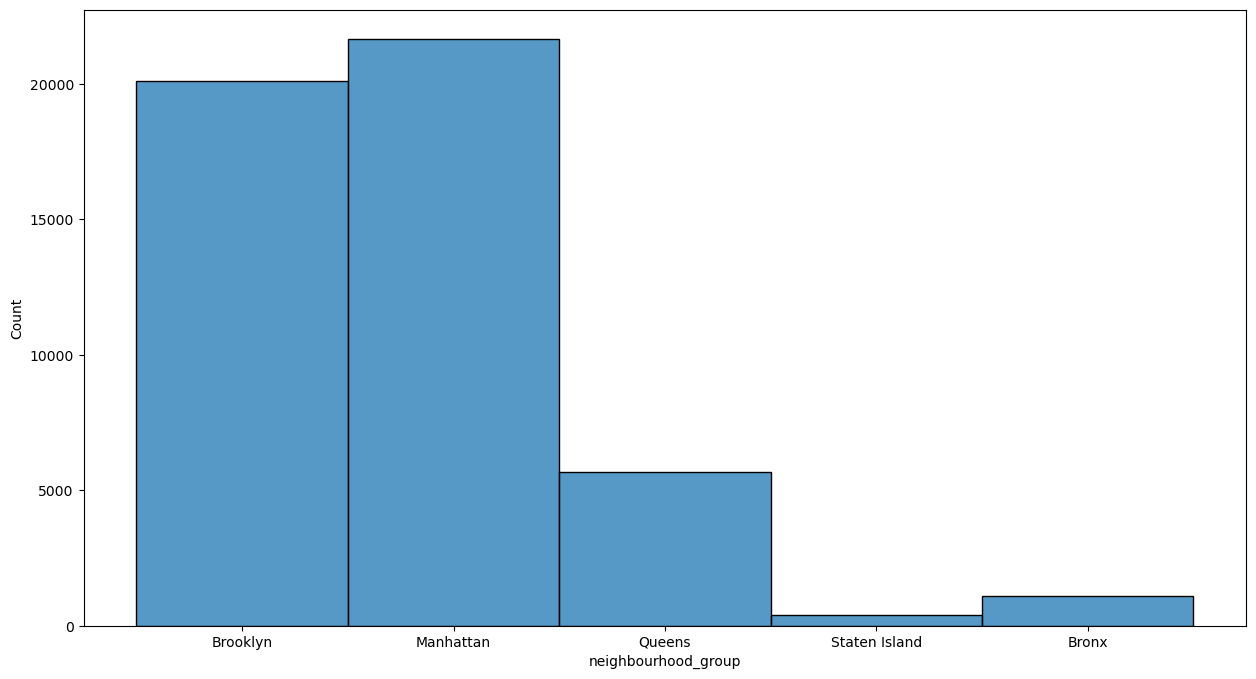

In [15]:
# analysis on categorical column
sns.histplot(df.neighbourhood_group,bins=10,binwidth=2.5)

# there are more number of manhattab airbnb followed by brooklyn . Staten Iskan has the least number of airbnb's

<Axes: xlabel='neighbourhood_group', ylabel='price'>

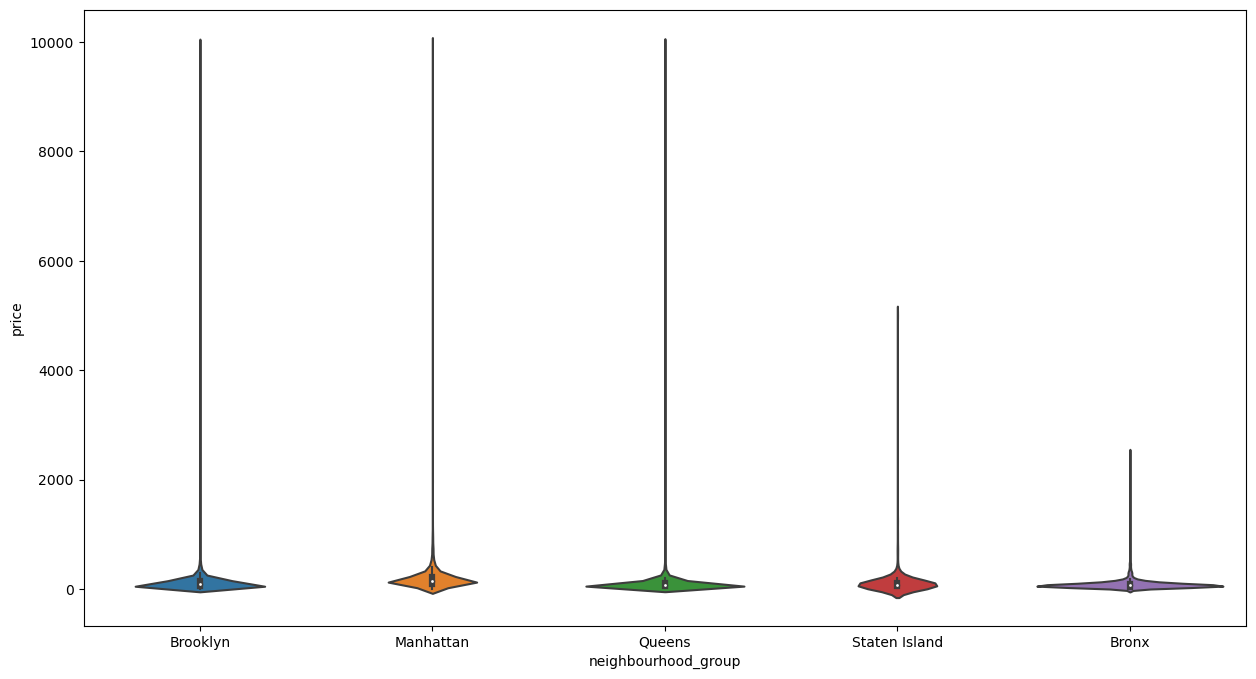

In [16]:
sns.violinplot(x=df.neighbourhood_group,y=df.price)

In [17]:
df.groupby("neighbourhood_group")["price"].sum()

neighbourhood_group
Bronx              95459
Brooklyn         2500600
Manhattan        4264527
Queens            563867
Staten Island      42825
Name: price, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

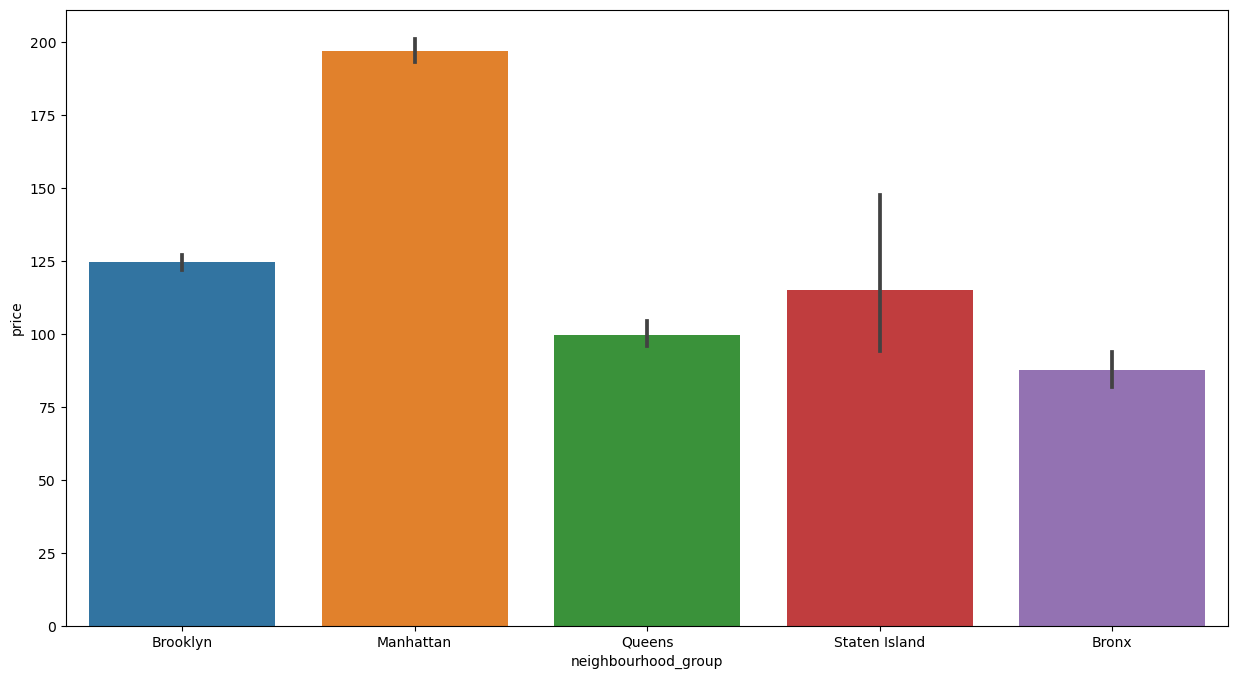

In [18]:
sns.barplot(y=df.price,x=df.neighbourhood_group)    # manhattan airbnb are costlier followed by brooklyn and staten island

<Axes: xlabel='price', ylabel='room_type'>

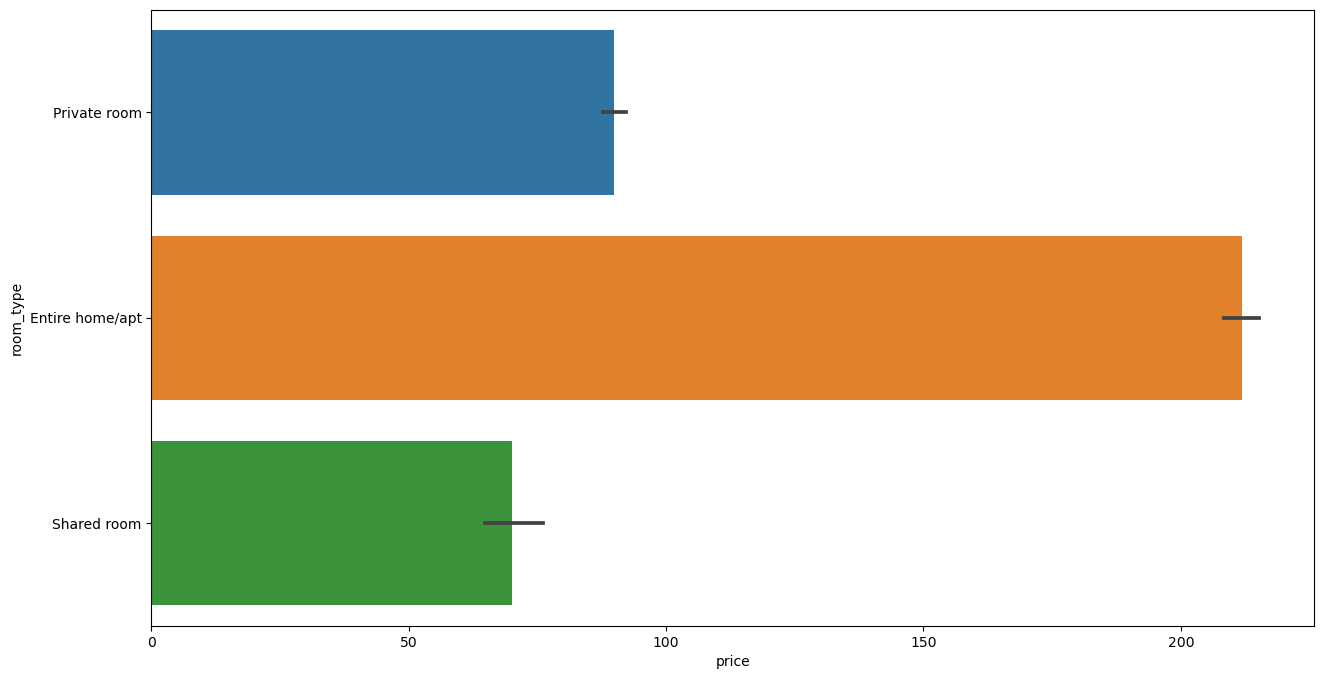

In [19]:
sns.barplot(x=df.price,y=df.room_type)   # entire room/apartment are the costlier room types

In [20]:
# pie chart on room type



df_room=df.room_type.value_counts().to_frame().reset_index()
df_room

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


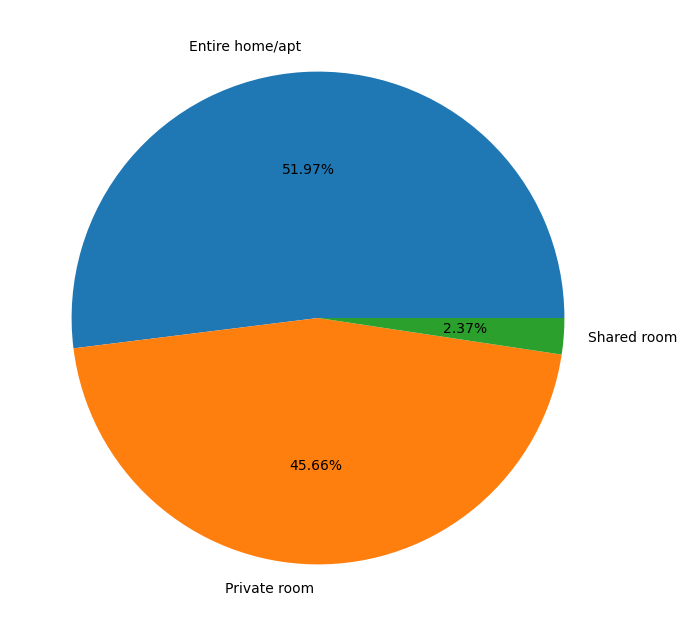

In [21]:
plt.pie(data=df_room,x="count",labels="room_type",autopct="%1.2f%%")
plt.show()            # THERE ARE NEARLY 51% OF APARTMENT TYPES ROOMS FOLLOWED BY 45% PRIVATE ROOMS AND 2.37% SHARED ROOMS

In [22]:
# top 10 neighbourhood which has more number of airbnb

neighbour=df.neighbourhood.value_counts()[:10].reset_index()
neighbour.rename(columns={"neighbourhood":"places"},inplace=True)

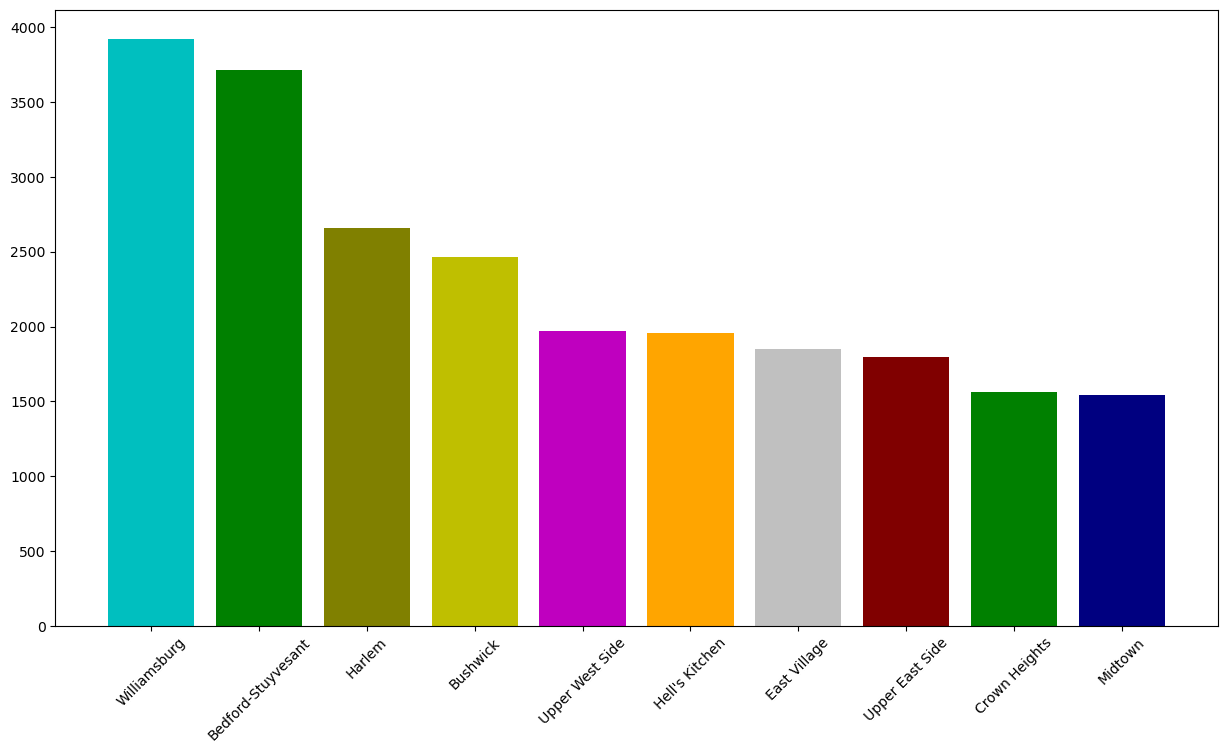

In [23]:
colors = ['c', 'g', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']


plt.bar(data=neighbour,x="places",height="count",color=colors)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='count'>

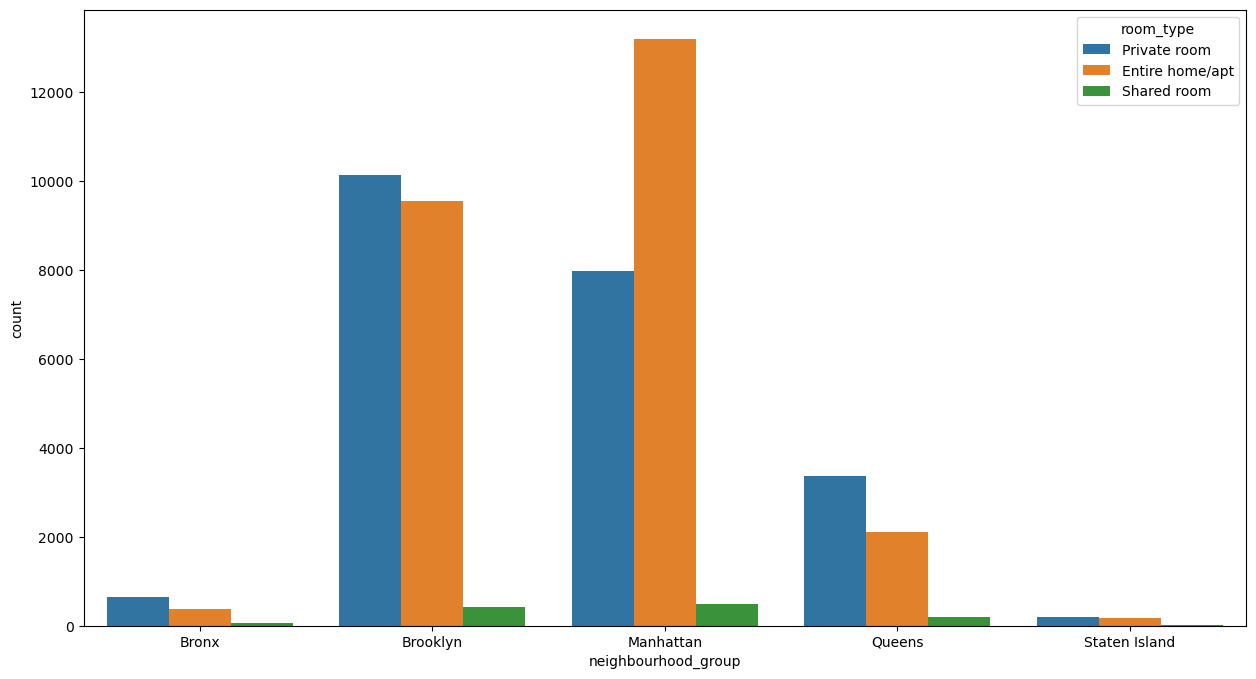

In [24]:
# neighbourhood group wise number of roomtype available

k=pd.DataFrame(df.groupby("neighbourhood_group")["room_type"].value_counts().reset_index())

sns.barplot(data=k,x="neighbourhood_group",y="count",hue="room_type")

# looks like manhattan has more number of apt/entire room,brooklyn has more number of private rooms, 
# staten island has no shareroom

<Axes: xlabel='latitude', ylabel='longitude'>

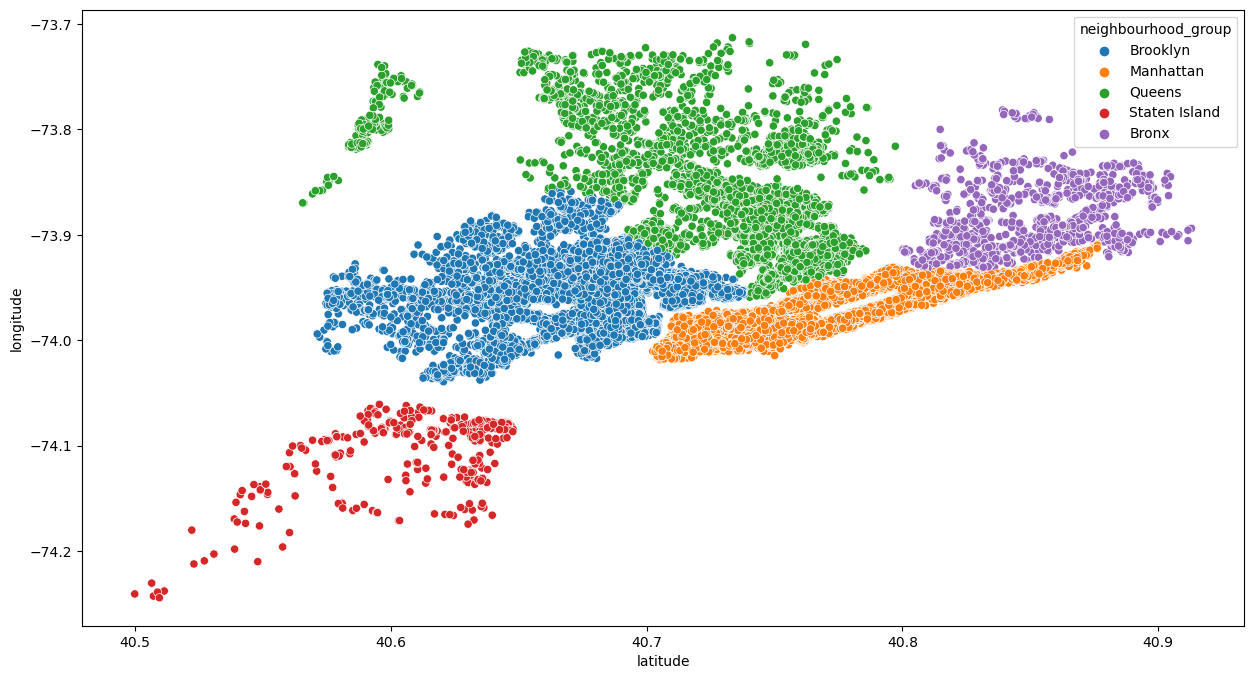

In [25]:
# coordinates of airbnb in each neighbourhood group

sns.scatterplot(x=df.latitude,y=df.longitude,hue=df.neighbourhood_group)


<Axes: xlabel='latitude', ylabel='longitude'>

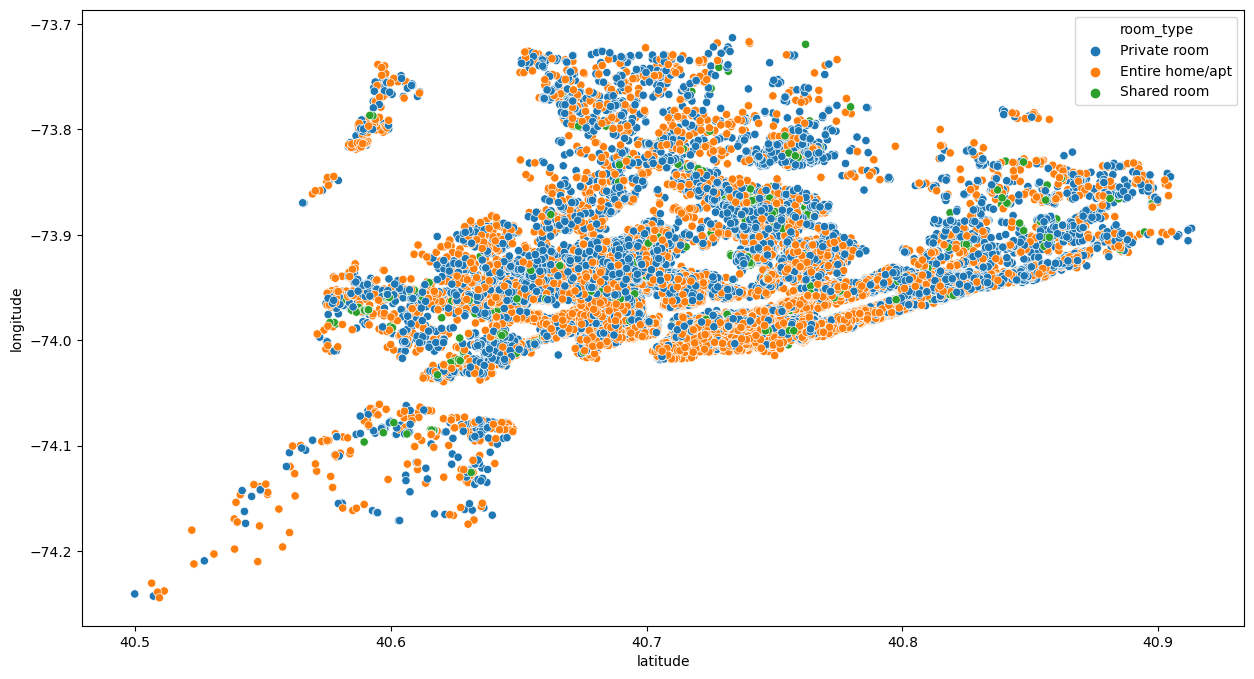

In [26]:
# coordinates of room_types

sns.scatterplot(x=df.latitude,y=df.longitude,hue=df.room_type)


<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

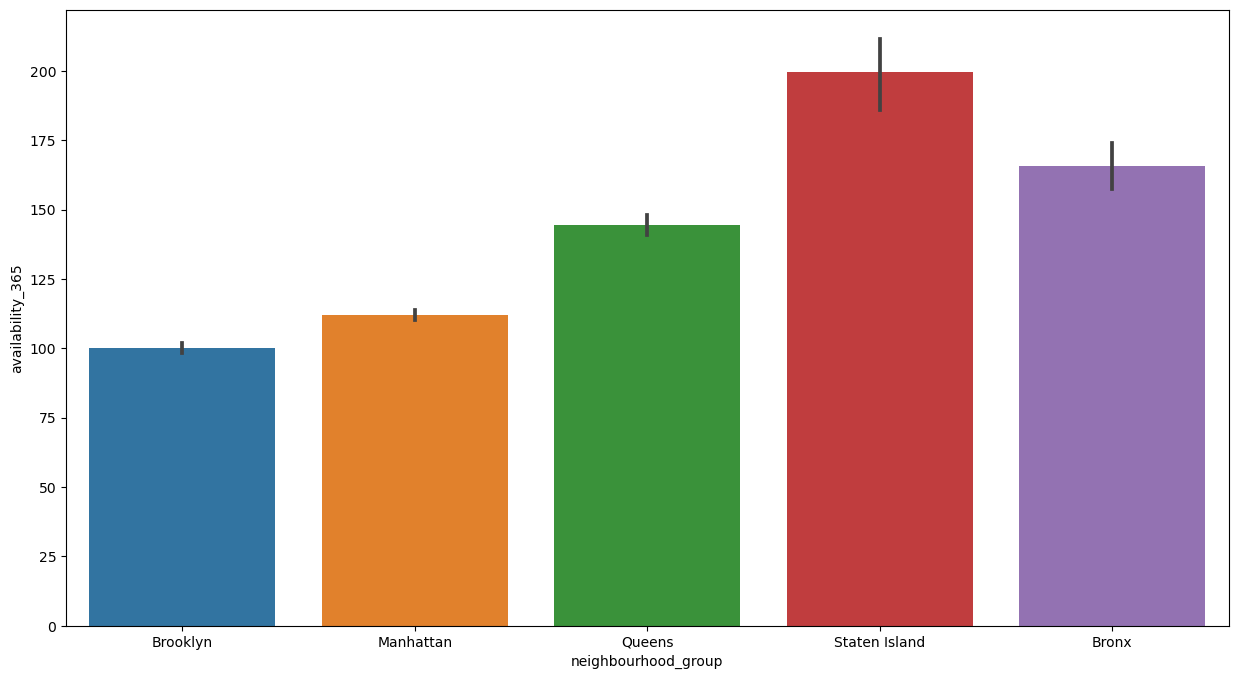

In [27]:
# availability of rooms in each neighbourhood_group
sns.barplot(x=df.neighbourhood_group,y=df.availability_365)

# staten island has room available for more than 200 days ,follwe by bronx

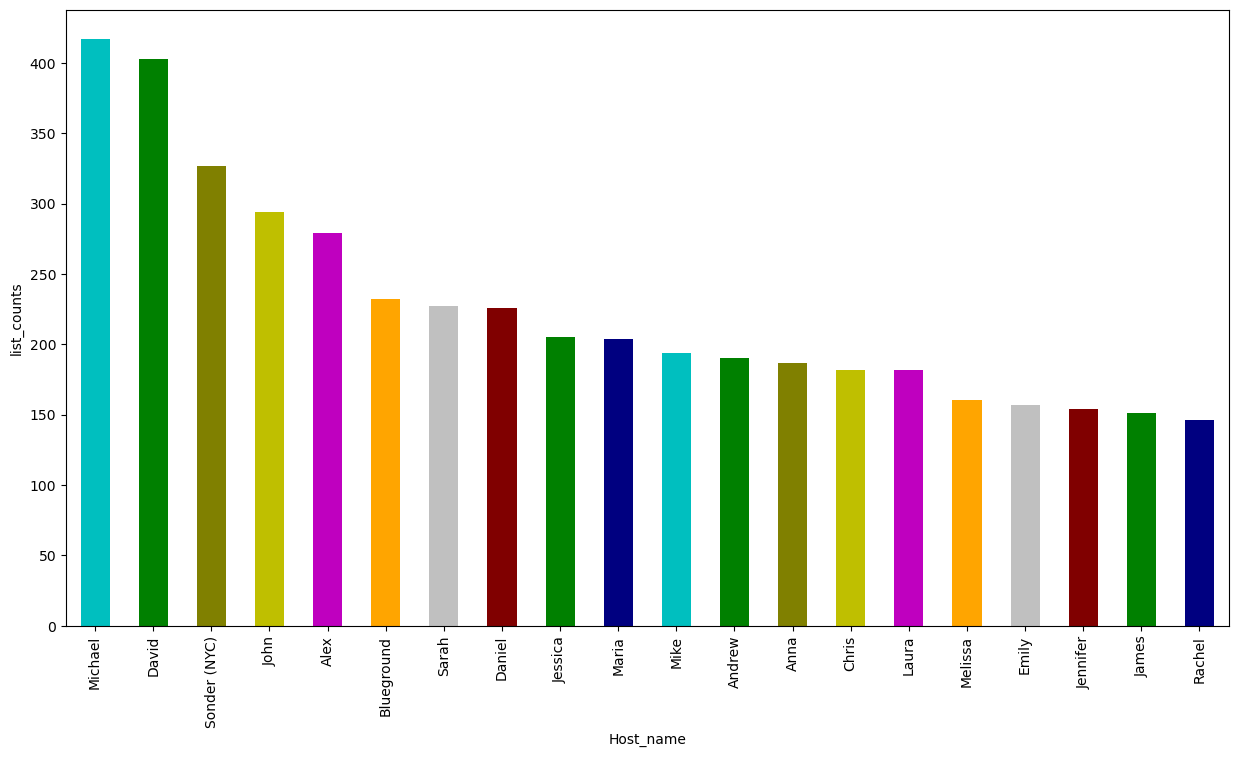

In [28]:
# retrieving top 20 host name

top_20_host=df["host_name"].value_counts()[:20]
top_20_host.plot(kind="bar",color=colors)
plt.xlabel("Host_name")
plt.ylabel("list_counts")
plt.show()                               # michael has more number of airbnb

In [29]:
top_20_host

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Mike            194
Andrew          190
Anna            187
Chris           182
Laura           182
Melissa         160
Emily           157
Jennifer        154
James           151
Rachel          146
Name: count, dtype: int64

<Axes: xlabel='neighbourhood'>

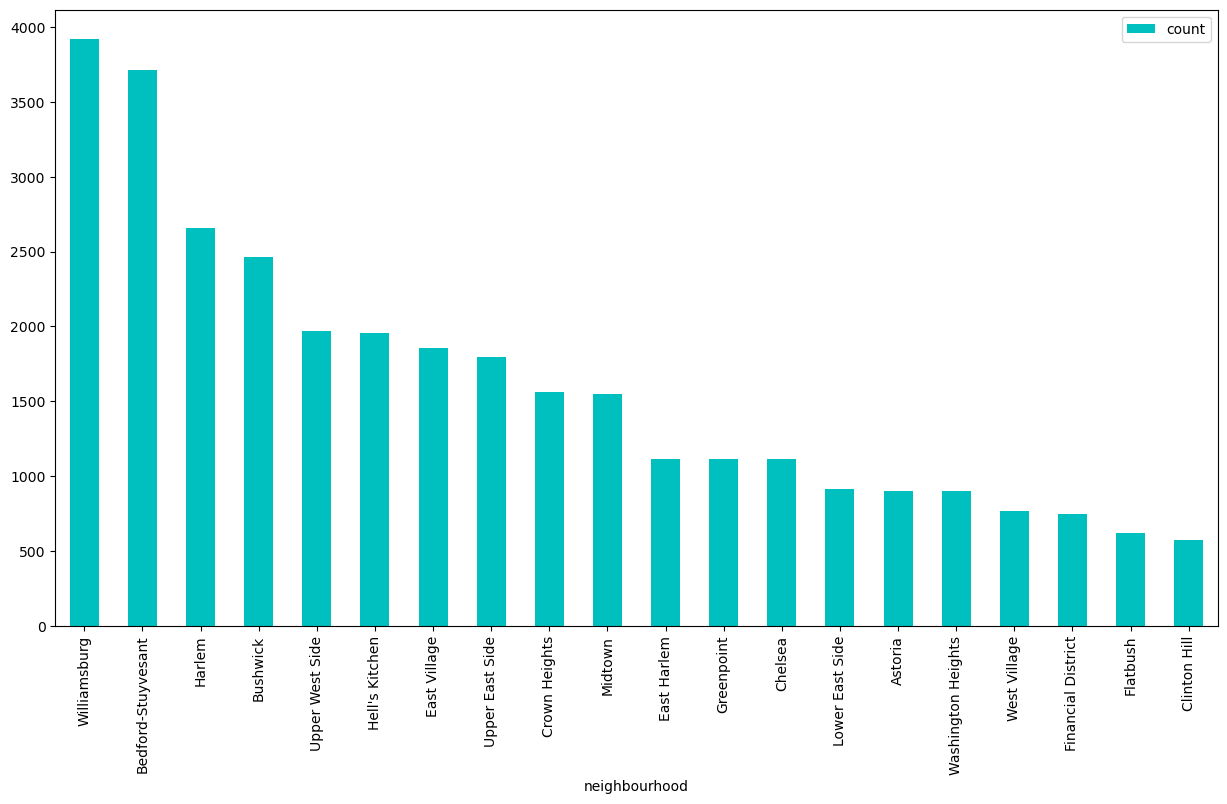

In [30]:
# top 20 neighbourhood which has more airbnb
top_20_neighbourhood=df["neighbourhood"].value_counts()[:20].to_frame()

top_20_neighbourhood.plot(kind="bar",color=colors)            # williamsburg has the highest number of airbnb's

<Axes: xlabel='neighbourhood_group'>

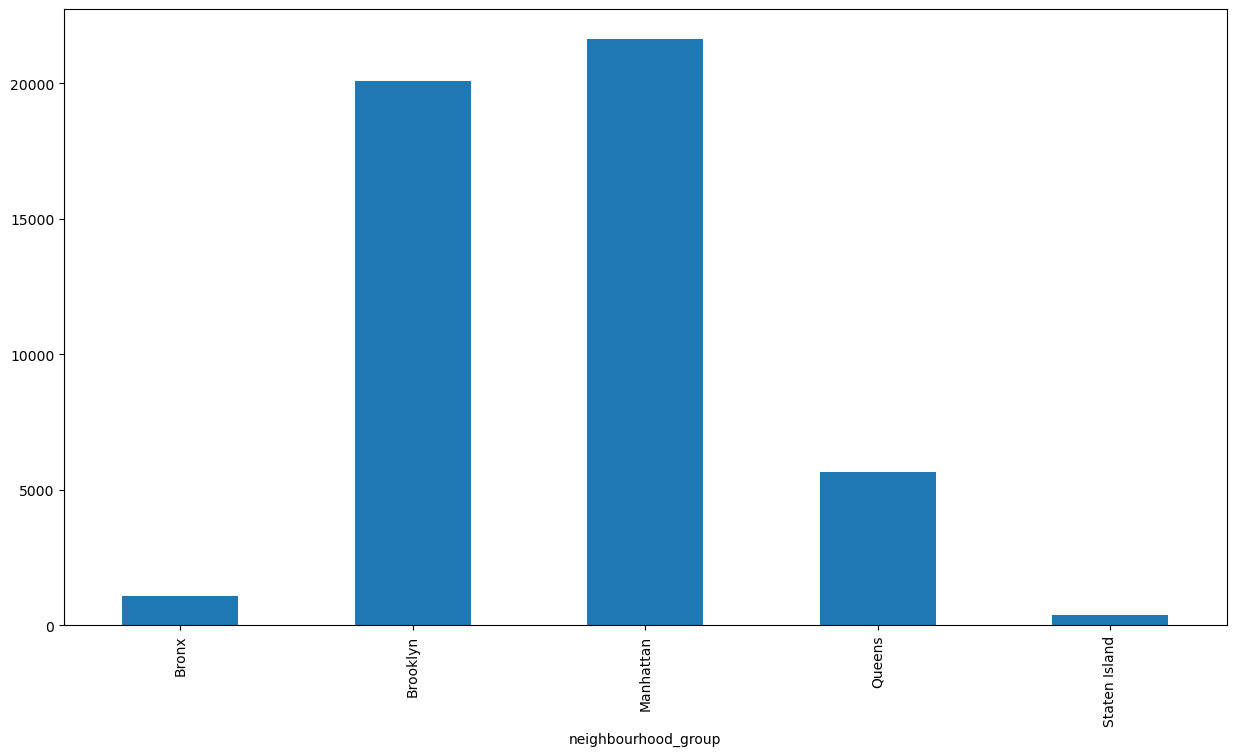

In [31]:
# retriving top hosts from different neighbourhood group
top_neighbourhood_group_host=df.groupby("neighbourhood_group")["host_name"].count()[:20]
top_neighbourhood_group_host.plot(kind="bar")      
# manhatten has maximumhosts,followed by brooklyn,staten island has the least hosts

<Axes: xlabel='price', ylabel='Density'>

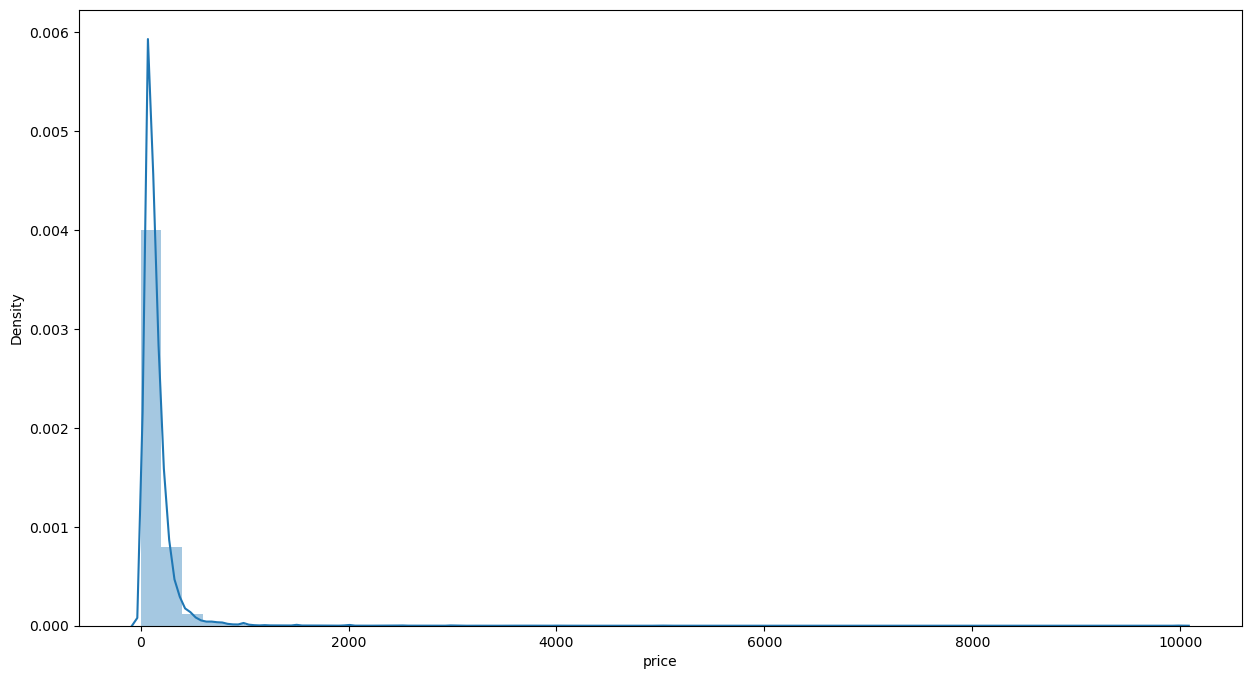

In [32]:
# distribution of prices

sns.distplot(df.price,kde=True,hist=True)

<Axes: xlabel='price'>

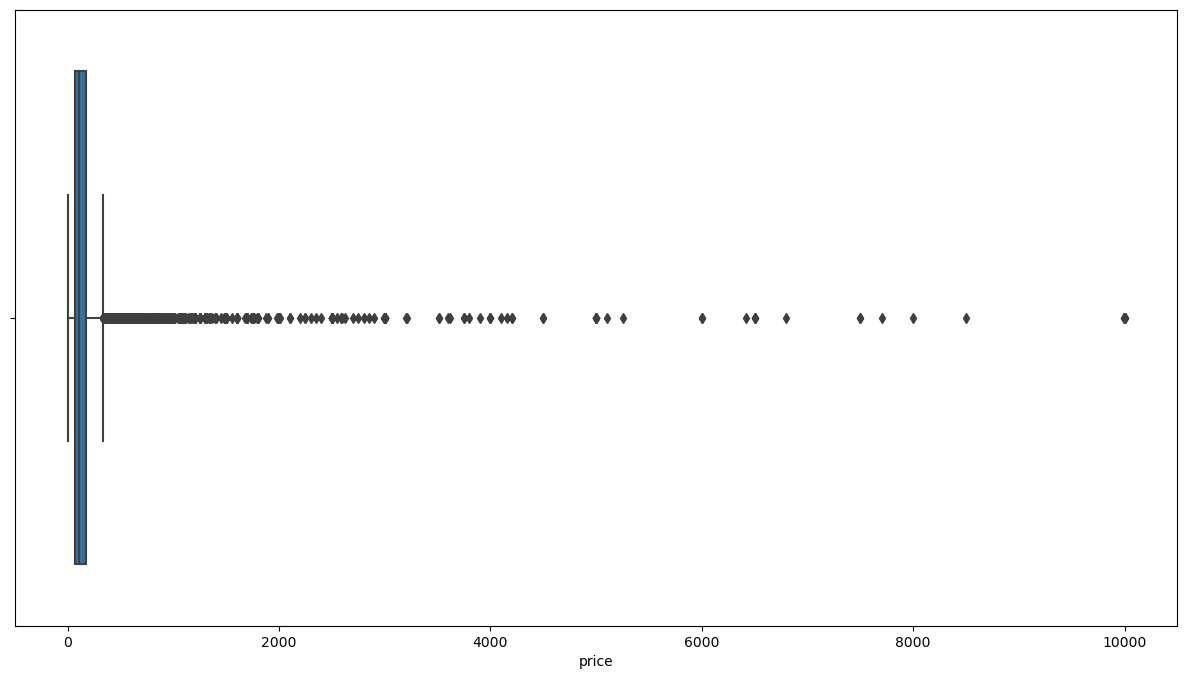

In [33]:
sns.boxplot(x=df.price)

EDA OBSERVATIONS

1.There are more number of manhattab airbnb followed by brooklyn . Staten Iskan has the least number of airbnb's

2.Manhattan airbnb are costlier followed by brooklyn and staten island

3.Entire room/apartment are the costliest room types

4.THERE ARE NEARLY 51% OF APARTMENT TYPES ROOMS FOLLOWED BY 45% PRIVATE ROOMS AND 2.37% SHARED ROOMS

5.Looks like manhattan has more number of apt/entire room,brooklyn has more number of private rooms, 

6.Staten island has no shareroom

7.Staten island has room available for more than 200 days ,follwe by bronx

8.Michael has more number of airbnb among the hosts

9.Williamsburg has the highest number of airbnb's

10.Manhatten has maximumhosts,followed by brooklyn,staten island has the least hosts

# MODEL BUILDING

In [35]:
df

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.647490,-73.972370,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.809020,-73.941900,Private room,150,3,0,0.720000,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.798510,-73.943990,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.678530,-73.949950,Private room,70,2,0,0.720000,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.701840,-73.933170,Private room,40,4,0,0.720000,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.814750,-73.948670,Entire home/apt,115,10,0,0.720000,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.757510,-73.991120,Shared room,55,1,0,0.720000,6,2


In [36]:
# we need to drop name,host_name,neighbourhood, columns as they cannot be used for further analysis

df.drop(["name","neighbourhood","host_name"],axis=1,inplace=True)


In [37]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.647490,-73.972370,Private room,149,1,9,0.210000,6,365
1,Manhattan,40.753620,-73.983770,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,40.809020,-73.941900,Private room,150,3,0,0.720000,1,365
3,Brooklyn,40.685140,-73.959760,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,40.798510,-73.943990,Entire home/apt,80,10,9,0.100000,1,0


In [40]:
df=pd.get_dummies(df,drop_first=True,dtype=int)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.647490,-73.972370,149,1,9,0.210000,6,365,1,0,0,0,1,0
1,40.753620,-73.983770,225,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.809020,-73.941900,150,3,0,0.720000,1,365,0,1,0,0,1,0
3,40.685140,-73.959760,89,1,270,4.640000,1,194,1,0,0,0,0,0
4,40.798510,-73.943990,80,10,9,0.100000,1,0,0,1,0,0,0,0


Building model without eliminating outliers

In [42]:
# basic slr model before scaling

x=df.drop("price",axis=1)
temp_x=sma.add_constant(x)
y=df.price

model=sma.OLS(y,temp_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     409.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:00:13   Log-Likelihood:            -3.3486e+05
No. Observations:               48895   AIC:                         6.697e+05
Df Residuals:                   48881   BIC:                         6.699e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.894e+04   3220.231     -8.986      0.000   -3.52e+04   -2.26e+04
latitude                           -203.9507     31.405     -6.494      0.000    -265.504    -142.397
longitude                          -506.2328     36.144    -14.006      0.000    -577.075    -435.391
minimum_nights                       -0.0347      0.052     -0.670      0.503      -0.136       0.067
number_of_reviews                    -0.3056      0.029    -10.719      0.000      -0.361      -0.250
reviews_per_month                     0.0325      0.840      0.039      0.969      -1.614       1.679
calculated_host_listings_count       -0.1733      0.033     -5.218      0.000      -0.238      -0.108
availability_365                      0.1941      0.008     22.963      0.000       0.178       0.211
neighbourhood_group_Brooklyn        -32.7460      8.778     -3.730      0.000     -49.951     -15.541
neighbourhood_group_Manhattan        28.7171      7.954      3.610      0.000      13.126      44.308
neighbourhood_group_Queens           -3.9640      8.447     -0.469      0.639     -20.521      12.593
neighbourhood_group_Staten Island  -152.6242     16.700     -9.139      0.000    -185.357    -119.891
room_type_Private room             -106.0901      2.161    -49.096      0.000    -110.325    -101.855
room_type_Shared room              -142.3964      6.883    -20.688      0.000    -155.887    -128.906
==============================================================================
Omnibus:                   110387.998   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        994306424.395
Skew:                          21.451   Prob(JB):                         0.00
Kurtosis:                     700.289   Cond. No.                     5.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# from the model we can infer that the cond no>1000 , hence there is multicollinerity, durbin-watson is between (1.5-2.5)
# hence there is no auto correlation

In [44]:

x=df.drop("price",axis=1)
temp_x=sma.add_constant(x)
y=df.price

x_train,x_test,y_train,y_test=train_test_split(temp_x,x,test_size=0.3,random_state=3)

lr=LinearRegression()
lr.fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)

rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))


print("r2 train :",r2_train)
print("r2 test :",r2_test)
print("rmse train :", rmse_train)
print("rmse test :",rmse_test)

r2 train : 1.0
r2 test : 1.0
rmse train : 2.4473124697328978e-14
rmse test : 2.4396351805815504e-14


In [46]:

x=df.drop("price",axis=1)
temp_x=sma.add_constant(x)
y=df.price

x_train,x_test,y_train,y_test=train_test_split(temp_x,x,test_size=0.3,random_state=3)

sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

lr=LinearRegression()
lr.fit(x_train_sc,y_train)

y_train_pred_sc=lr.predict(x_train_sc)
y_test_pred_sc=lr.predict(x_test_sc)

r2_train_sc=r2_score(y_train,y_train_pred_sc)
r2_test_sc=r2_score(y_test,y_test_pred_sc)

rmse_train_sc=np.sqrt(mean_squared_error(y_train,y_train_pred_sc))
rmse_test_sc=np.sqrt(mean_squared_error(y_test,y_test_pred_sc))


print("scaled r2 train :",r2_train)
print("scaled r2 test :",r2_test)
print("scaled rmse train :", rmse_train)
print("scaled rmse test :",rmse_test)

scaled r2 train : 1.0
scaled r2 test : 1.0
scaled rmse train : 2.4473124697328978e-14
scaled rmse test : 2.4396351805815504e-14


In [47]:
# Performing different test



x=df.drop("price",axis=1)
temp_x=sma.add_constant(x)
y=df.price

model=sma.OLS(y,temp_x).fit()
model.summary()

# test of linearity

sma.stats.diagnostic.linear_rainbow(model)       # pval<0.05 , hence reject h0, the data has no linear relationship with target variable

(1.4110990098721679, 4.043278672907072e-159)

In [49]:
# test of normality

stats.jarque_bera(model.resid)   # pval<0.05, hence error are not normally distributed

SignificanceResult(statistic=994306424.394511, pvalue=0.0)

In [57]:
# transform y

from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()


x=df.drop("price",axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]

model=sma.OLS(y,temp_x).fit()
model.summary()

stats.jarque_bera(model.resid)   # pval<0.05, hence error are not normally distributed

SignificanceResult(statistic=261709.55823090687, pvalue=0.0)

In [58]:
x=df.drop("price",axis=1)
temp_x=sma.add_constant(x)
y=np.sqrt(df.price)

model=sma.OLS(y,temp_x).fit()
model.summary()

stats.jarque_bera(model.resid)   # pval<0.05, hence error are not normally distributed

# normality fails

SignificanceResult(statistic=13149755.846531836, pvalue=0.0)

In [60]:
# mullticollinearity

vif=[variance_inflation_factor(x_train.values,i)            for i in range(x_train.shape[1])]

vif_df=pd.DataFrame(vif,index=x_train.columns.to_list(), columns=["VIF-value"])
vif_df

,VIF-value
const,9878685.575213
latitude,2.783236
longitude,2.636783
minimum_nights,1.055008
number_of_reviews,1.505855
reviews_per_month,1.525437
calculated_host_listings_count,1.127844
availability_365,1.161269
neighbourhood_group_Brooklyn,17.698011
neighbourhood_group_Manhattan,14.815748


In [64]:
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=np.sqrt(df.price)


x_train,x_test,y_train,y_test=train_test_split(temp_x,x,test_size=0.3,random_state=3)





vif=[variance_inflation_factor(x_train.values,i)            for i in range(x_train.shape[1])]

vif_df=pd.DataFrame(vif,index=x_train.columns.to_list(), columns=["VIF-value"])
vif_df

,VIF-value
const,9762765.118300
latitude,2.017520
longitude,2.596521
minimum_nights,1.054726
number_of_reviews,1.504101
reviews_per_month,1.523474
calculated_host_listings_count,1.124697
availability_365,1.153912
neighbourhood_group_Manhattan,2.578919
neighbourhood_group_Queens,1.715793


In [109]:
# linear model without transforming target variable

x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=df.price


x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)

model=sma.OLS(y_train,x_train).fit()

#R_squared=0.099
#Adj_R_squared=0.098
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     312.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:21:46   Log-Likelihood:            -2.3390e+05
No. Observations:               34226   AIC:                         4.678e+05
Df Residuals:                   34213   BIC:                         4.679e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.869e+04   3796.999     -7.557      0.000   -3.61e+04   -2.13e+04
latitude                           -129.8114     31.699     -4.095      0.000    -191.942     -67.681
longitude                          -461.7450     42.443    -10.879      0.000    -544.935    -378.555
minimum_nights                       -0.1613      0.060     -2.700      0.007      -0.278      -0.044
number_of_reviews                    -0.2701      0.034     -8.061      0.000      -0.336      -0.204
reviews_per_month                    -0.9347      0.979     -0.955      0.339      -2.853       0.983
calculated_host_listings_count       -0.1426      0.039     -3.672      0.000      -0.219      -0.066
availability_365                      0.1807      0.010     18.193      0.000       0.161       0.200
neighbourhood_group_Manhattan        55.5858      3.928     14.152      0.000      47.887      63.285
neighbourhood_group_Queens           24.1804      4.997      4.839      0.000      14.387      33.974
neighbourhood_group_Staten Island  -124.0105     15.354     -8.077      0.000    -154.104     -93.917
room_type_Private room             -108.2271      2.541    -42.589      0.000    -113.208    -103.246
room_type_Shared room              -141.0709      8.115    -17.384      0.000    -156.977    -125.165
==============================================================================
Omnibus:                    79396.277   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        886605259.172
Skew:                          22.835   Prob(JB):                         0.00
Kurtosis:                     790.160   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=df.price


x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)
lr=LinearRegression()

lr.fit(x_train,y_train)

y_test_pred=lr.predict(x_test)
r2_test=r2_score(y_test,y_test_pred)
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))


In [112]:
Adj_R_squared=0.099
R_squared=0.098


linreg_full_model_without_tranforming_y_rmse =rmse_test

# calculate R-squared using rsquared
linreg_full_model_without_tranforming_y_rsquared = R_squared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_without_transforming_y_rsquared_adj =Adj_R_squared

In [113]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [104]:
import pandas as pd

In [114]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.DataFrame({
                     'Model_Name':["Linreg full model without tranforming  of target variable"],
                     'RMSE':[linreg_full_model_without_tranforming_y_rmse],
                     'R-Squared': [linreg_full_model_without_tranforming_y_rsquared],
                     'Adj. R-Squared':[linreg_full_model_without_transforming_y_rsquared_adj]
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withoutlog_metrics], ignore_index=True)

# print the result table
score_card





,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652


In [117]:
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]


x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)
model=sma.OLS(y_train,x_train).fit()

#R_squared=0.510
#Adj_R_squared=0.510
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     2967.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:23:57   Log-Likelihood:                 3951.2
No. Observations:               34226   AIC:                            -7876.
Df Residuals:                   34213   BIC:                            -7767.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -88.5799      3.642    -24.323      0.000     -95.718     -81.442
latitude                             -0.2357      0.030     -7.752      0.000      -0.295      -0.176
longitude                            -1.3727      0.041    -33.719      0.000      -1.452      -1.293
minimum_nights                       -0.0009   5.73e-05    -15.429      0.000      -0.001      -0.001
number_of_reviews                    -0.0003   3.21e-05     -8.583      0.000      -0.000      -0.000
reviews_per_month                     0.0005      0.001      0.513      0.608      -0.001       0.002
calculated_host_listings_count       -0.0001   3.72e-05     -3.126      0.002      -0.000   -4.34e-05
availability_365                      0.0003   9.53e-06     31.766      0.000       0.000       0.000
neighbourhood_group_Manhattan         0.1354      0.004     35.934      0.000       0.128       0.143
neighbourhood_group_Queens            0.0577      0.005     12.035      0.000       0.048       0.067
neighbourhood_group_Staten Island    -0.3654      0.015    -24.815      0.000      -0.394      -0.337
room_type_Private room               -0.3395      0.002   -139.307      0.000      -0.344      -0.335
room_type_Shared room                -0.5390      0.008    -69.248      0.000      -0.554      -0.524
==============================================================================
Omnibus:                     6379.119   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180414.657
Skew:                           0.077   Prob(JB):                         0.00
Kurtosis:                      14.247   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
# transforming y variable
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]


x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)
lr=LinearRegression()

lr.fit(x_train,y_train)

y_test_pred=lr.predict(x_test)
r2_test=r2_score(y_test,y_test_pred)
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))


In [123]:
Adj_R_squared=0.510
R_squared=0.510


linreg_full_model_with_tranforming_y_rmse =rmse_test

# calculate R-squared using rsquared
linreg_full_model_with_tranforming_y_rsquared = R_squared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_with_transforming_y_rsquared_adj =Adj_R_squared

In [124]:
linreg_full_model_withoutlog_metrics = pd.DataFrame({
                     'Model_Name':["Linreg full model with tranforming  the target variable"],
                     'RMSE':[linreg_full_model_with_tranforming_y_rmse],
                     'R-Squared': [linreg_full_model_with_tranforming_y_rsquared],
                     'Adj. R-Squared':[linreg_full_model_with_transforming_y_rsquared_adj]
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withoutlog_metrics], ignore_index=True)

# print the result table
score_card


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652
1,Linreg full model with tranforming the target...,0.510000,0.510000,0.222012


In [126]:
# building a model with best variables
lr=LinearRegression()
! pip install mlxtend

In [127]:
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]


x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)
lr=LinearRegression()

In [131]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs_forward=SequentialFeatureSelector(estimator=lr,forward=True,k_features="best",verbose=2,scoring="r2")
sfs_forward.fit(x_train,y_train)

print(sfs_forward.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2024-04-10 17:33:11] Features: 1/13 -- score: 0.32961055051549176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2024-04-10 17:33:11] Features: 2/13 -- score: 0.4030242821332772[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2024-04-10 17:33:12] Features: 3/13 -- score: 0.47039517646808016[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

('latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Private room', 'room_type_Shared room')


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2024-04-10 17:33:14] Features: 12/13 -- score: 0.5092885780498039[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2024-04-10 17:33:14] Features: 13/13 -- score: 0.5092613867681974

In [134]:
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]


x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)
lr=LinearRegression()

sfs_train=x_train.loc[:,sfs_forward.k_feature_names_]
sfs_test=x_test.loc[:,sfs_forward.k_feature_names_]


model=sma.OLS(y_train,sfs_train).fit()
model.summary()       # condition number >10^3 hence there is heavy multicollinerity

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          6.977e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:38:01   Log-Likelihood:                          3656.5
No. Observations:               34226   AIC:                                     -7291.
Df Residuals:                   34215   BIC:                                     -7198.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitude                             -0.7066      0.024    -29.862      0.000      -0.753      -0.660
longitude                            -0.4340      0.013    -33.336      0.000      -0.460      -0.409
minimum_nights                       -0.0008   5.76e-05    -14.491      0.000      -0.001      -0.001
number_of_reviews                    -0.0003   2.71e-05    -10.259      0.000      -0.000      -0.000
calculated_host_listings_count     -8.51e-05   3.75e-05     -2.267      0.023      -0.000   -1.15e-05
availability_365                      0.0003   9.53e-06     29.210      0.000       0.000       0.000
neighbourhood_group_Manhattan         0.1937      0.003     66.031      0.000       0.188       0.199
neighbourhood_group_Queens            0.0069      0.004      1.585      0.113      -0.002       0.015
neighbourhood_group_Staten Island    -0.2528      0.014    -17.944      0.000      -0.280      -0.225
room_type_Private room               -0.3430      0.002   -139.784      0.000      -0.348      -0.338
room_type_Shared room                -0.5423      0.008    -69.097      0.000      -0.558      -0.527
==============================================================================
Omnibus:                     6287.203   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172518.801
Skew:                           0.056   Prob(JB):                         0.00
Kurtosis:                      13.998   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
vif1=[variance_inflation_factor(sfs_train.values,j)          for j in range(sfs_train.shape[1])]

vif1_df=pd.DataFrame(vif1,index=sfs_train.columns.to_list(),columns=["VIF-VALUES"])
vif1_df

,VIF-VALUES
latitude,672125.020744
longitude,670770.207518
minimum_nights,1.165248
number_of_reviews,1.337148
calculated_host_listings_count,1.175989
availability_365,1.963433
neighbourhood_group_Manhattan,2.762486
neighbourhood_group_Queens,1.567536
neighbourhood_group_Staten Island,1.116187
room_type_Private room,1.992554


In [144]:
sfs_train.drop("latitude",axis=1,inplace=True)
vif1=[variance_inflation_factor(sfs_train.values,j)          for j in range(sfs_train.shape[1])]

vif1_df=pd.DataFrame(vif1,index=sfs_train.columns.to_list(),columns=["VIF-VALUES"])
vif1_df


,VIF-VALUES
longitude,4.351483
minimum_nights,1.165169
number_of_reviews,1.336968
calculated_host_listings_count,1.163705
availability_365,1.962079
neighbourhood_group_Manhattan,2.102195
neighbourhood_group_Queens,1.280747
neighbourhood_group_Staten Island,1.022779
room_type_Private room,1.958627
room_type_Shared room,1.053942


In [155]:
sfs_test

,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
6920,-73.986900,2,149,1,0,0,0,0,0,0
38903,-73.950520,21,1,1,342,1,0,0,1,0
30764,-73.942420,1,0,1,53,0,0,0,0,0
20675,-73.973640,3,0,2,0,0,0,0,1,0
33165,-73.988240,2,72,1,96,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3318,-73.964560,5,0,1,365,0,0,0,0,0
38702,-73.997390,30,1,232,310,1,0,0,0,0
21504,-74.003100,3,1,1,0,1,0,0,0,0
22623,-73.971120,3,0,1,0,1,0,0,1,0


In [156]:
sfs_train

,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
9567,-73.942590,1,0,1,0,0,0,0,1,0
16312,-73.986820,7,52,1,0,1,0,0,0,0
7764,-73.960160,30,53,11,201,0,0,0,1,0
15677,-73.963730,20,1,1,90,1,0,0,1,0
20342,-73.943500,7,6,1,62,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
25544,-73.989480,1,0,1,0,1,0,0,0,0
48056,-73.912470,1,0,1,179,0,1,0,1,0
11513,-73.923460,1,150,9,323,0,1,0,1,0
1688,-73.763140,2,67,2,322,0,1,0,0,0


In [149]:
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]

model=sma.OLS(y_train,sfs_train).fit()
model.summary()       # condition number >10^3 hence there 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          7.479e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:44:10   Log-Likelihood:                          3216.2
No. Observations:               34226   AIC:                                     -6412.
Df Residuals:                   34216   BIC:                                     -6328.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
longitude                            -0.0452   3.36e-05  -1346.659      0.000      -0.045      -0.045
minimum_nights                       -0.0008   5.83e-05    -14.063      0.000      -0.001      -0.001
number_of_reviews                    -0.0003   2.75e-05    -10.470      0.000      -0.000      -0.000
calculated_host_listings_count     2.946e-05   3.78e-05      0.779      0.436   -4.47e-05       0.000
availability_365                      0.0003   9.65e-06     28.073      0.000       0.000       0.000
neighbourhood_group_Manhattan         0.1508      0.003     58.205      0.000       0.146       0.156
neighbourhood_group_Queens           -0.0486      0.004    -12.220      0.000      -0.056      -0.041
neighbourhood_group_Staten Island    -0.1311      0.014     -9.597      0.000      -0.158      -0.104
room_type_Private room               -0.3526      0.002   -143.069      0.000      -0.357      -0.348
room_type_Shared room                -0.5490      0.008    -69.092      0.000      -0.565      -0.533
==============================================================================
Omnibus:                     6180.141   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162976.492
Skew:                           0.036   Prob(JB):                         0.00
Kurtosis:                      13.690   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:



lr.fit(sfs_train,y_train)
sfs_fwd_y_pred=lr.predict(sfs_test)

rmse_sfs_fwd=np.sqrt(mean_squared_error(y_test,sfs_fwd_y_pred))
r2_score_sfs_fws=r2_score(y_test,sfs_fwd_y_pred)



Adj_R_squared=0.995
R_squared=0.995


linreg_full_model_with_tranforming_y_sfs_fwd_best =rmse_sfs_fwd

# calculate R-squared using rsquared
linreg_full_model_with_tranforming_y_sfs_fwd_rsquared = R_squared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_with_transforming_y_sfs_fws_rsquared_adj =Adj_R_squared



linreg_full_model_withoutlog_metrics = pd.DataFrame({
                     'Model_Name':["SFS FORWARD(BEST)-WITH TRANSFORMED Y"],
                     'RMSE':[linreg_full_model_with_tranforming_y_sfs_fwd_best],
                     'R-Squared': [linreg_full_model_with_tranforming_y_sfs_fwd_rsquared],
                     'Adj. R-Squared':[linreg_full_model_with_transforming_y_sfs_fws_rsquared_adj]
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withoutlog_metrics], ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652
1,Linreg full model with tranforming the target...,0.510000,0.510000,0.222012
2,Linreg full model with tranforming the target...,0.995000,0.995000,0.222175
3,SFS FORWARD(BEST)-WITH TRANSFORMED Y,0.995000,0.995000,0.222175


In [164]:
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [173]:
# RIDGE AND LASSO AND ELASTIC NET MODELS
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]
x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)


r=Ridge(alpha=0.01)
r.fit(x_train,y_train)
ridge_y_pred=r.predict(x_test)
rmse_ridge=np.sqrt(mean_squared_error(y_test,ridge_y_pred))

r2_ridge=r2_score(y_test,ridge_y_pred)
# Calculate adjusted R²
n = len(y)
p = x.shape[1]
adjusted_r2 = 1 - ((1 - r2_ridge) * (n - 1) / (n - p - 1))


print("rmse ridge :",rmse_ridge)
print("r2 score ridge :",r2_ridge)
print("adjusted r2 ridge :",adjusted_r2)

rmse ridge : 0.2220118612597842
r2 score ridge : 0.4944127449120871
adjusted r2 ridge : 0.49428862873310386


In [174]:
linreg_full_model_withoutlog_metrics = pd.DataFrame({
                     'Model_Name':["Ridge model-WITH TRANSFORMED Y"],
                     'RMSE':[rmse_ridge],
                     'R-Squared': [r2_ridge],
                     'Adj. R-Squared':[adjusted_r2]
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withoutlog_metrics], ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652
1,Linreg full model with tranforming the target...,0.510000,0.510000,0.222012
2,Linreg full model with tranforming the target...,0.995000,0.995000,0.222175
3,SFS FORWARD(BEST)-WITH TRANSFORMED Y,0.995000,0.995000,0.222175
4,Ridge model-WITH TRANSFORMED Y,0.494413,0.494289,0.222012


In [186]:
# lasso
l=Lasso(alpha=0.001)
l.fit(x_train,y_train)
lasso_y_pred=l.predict(x_test)
rmse_lasso=np.sqrt(mean_squared_error(y_test,lasso_y_pred))

r2_lasso=r2_score(y_test,lasso_y_pred)
adjusted_r2_lasso = 1 - ((1 - r2_lasso) * (n - 1) / (n - p - 1))


print("rmse_lasso :",rmse_lasso)
print("r2 lasso :",r2_lasso)
print("adjusted r2 lasso :",adjusted_r2_lasso)



linreg_full_model_withoutlog_metrics = pd.DataFrame({
                     'Model_Name':["Lasso model(alpha 0.001-WITH TRANSFORMED Y"],
                     'RMSE':[rmse_lasso],
                     'R-Squared': [r2_lasso],
                     'Adj. R-Squared':[adjusted_r2_lasso]
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withoutlog_metrics], ignore_index=True)

# print the result table
score_card

rmse_lasso : 0.22495408405897313
r2 lasso : 0.48092331010045586
adjusted r2 lasso : 0.48079588241176074


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652
1,Linreg full model with tranforming the target...,0.510000,0.510000,0.222012
2,Linreg full model with tranforming the target...,0.995000,0.995000,0.222175
3,SFS FORWARD(BEST)-WITH TRANSFORMED Y,0.995000,0.995000,0.222175
4,Ridge model-WITH TRANSFORMED Y,0.494413,0.494289,0.222012
5,Lasso model-WITH TRANSFORMED Y,0.012997,0.012755,0.310197
6,Lasso model(alpha 0.001-WITH TRANSFORMED Y,0.480923,0.480796,0.224954


In [194]:
x=df.drop(["price","neighbourhood_group_Brooklyn"],axis=1)
temp_x=sma.add_constant(x)
y=scipy.stats.yeojohnson(df.price)[0]
x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.3,random_state=3)

e=ElasticNet(alpha=0.001,l1_ratio=0.6)
e.fit(x_train,y_train)
e_y_pred=r.predict(x_test)

rmse_elastic=np.sqrt(mean_squared_error(y_test,e_y_pred))
r2_elastic=r2_score(y_test,e_y_pred)
adjusted_r2_elastic = 1 - ((1 - r2_elastic) * (n - 1) / (n - p - 1))

print("rmse elastic :",rmse_elastic)
print("r2 elastic :",r2_elastic)
print("adjusted r2 elastic :",adjusted_r2_elastic)


linreg_full_model_withoutlog_metrics = pd.DataFrame({
                     'Model_Name':["Elastic Net model(alpha=0.001,l1_ratio=0.6)"],
                     'RMSE':[rmse_elastic],
                     'R-Squared': [r2_elastic],
                     'Adj. R-Squared':[adjusted_r2_elastic]
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withoutlog_metrics], ignore_index=True)

# print the result table
score_card

rmse elastic : 0.2220118612597842
r2 elastic : 0.4944127449120871
adjusted r2 elastic : 0.49428862873310386


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652
1,Linreg full model with tranforming the target...,0.510000,0.510000,0.222012
2,Linreg full model with tranforming the target...,0.995000,0.995000,0.222175
3,SFS FORWARD(BEST)-WITH TRANSFORMED Y,0.995000,0.995000,0.222175
4,Ridge model-WITH TRANSFORMED Y,0.494413,0.494289,0.222012
5,Lasso model-WITH TRANSFORMED Y,0.012997,0.012755,0.310197
6,Lasso model(alpha 0.001-WITH TRANSFORMED Y,0.480923,0.480796,0.224954
7,"Elastic Net model(alpha=0.001,l1_ratio=0.6)",0.494413,0.494289,0.222012


In [195]:
from sklearn.model_selection import cross_val_score

In [216]:
# k fold r2

kfold=KFold(n_splits=5)
lr=LinearRegression()
k_score=cross_val_score(lr,x_train,y_train,cv=kfold,scoring="r2",verbose=2)
print(k_score)
avg_k_score=np.mean(k_score)
print("mean of kfold score :",np.mean(k_score))




[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[0.51745523 0.51344768 0.51222122 0.50844487 0.49473793]
mean of kfold score : 0.5092613867681997


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [207]:
# k fold rmse

kfold=KFold(n_splits=5)
lr=LinearRegression()
k_rmse=cross_val_score(lr,x_train,y_train,cv=kfold,scoring="neg_root_mean_squared_error",verbose=2)
print("rmse kfold :",abs(k_rmse))
avg_k_rmse=np.mean(np.sqrt(abs(k_rmse)))

print("avg_err :", np.mean(np.sqrt(abs(k_rmse))))


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
rmse kfold : [0.21358898 0.21502064 0.21456748 0.21487632 0.22057694]
avg_err : 0.4644556183870038


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [217]:
linreg_full_model_withoutlog_metrics = pd.DataFrame({
                     'Model_Name':["Kfold"],
                     'RMSE':[avg_k_rmse],
                     'R-Squared': [avg_k_score],
                     'Adj. R-Squared':["nil"]
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withoutlog_metrics], ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652
1,Linreg full model with tranforming the target...,0.510000,0.510000,0.222012
2,SFS FORWARD(BEST)-WITH TRANSFORMED Y,0.995000,0.995000,0.222175
3,Ridge model-WITH TRANSFORMED Y,0.494413,0.494289,0.222012
4,Lasso model-WITH TRANSFORMED Y,0.012997,0.012755,0.310197
5,Lasso model(alpha 0.001-WITH TRANSFORMED Y,0.480923,0.480796,0.224954
6,"Elastic Net model(alpha=0.001,l1_ratio=0.6)",0.494413,0.494289,0.222012
7,Kfold,0.509261,nil,0.464456


In [221]:
# Linear regression with SGD using gridsearch cv

from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(x_train, y_train)
linreg_with_SGD_predictions = linreg_with_SGD.predict(x_test)


linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]-1)


print("SGD RMSE :",linreg_SGD_rmse)
print("SGD R2 :",linreg_SGD_r_squared)
print("SGD ADJ R2 :",linreg_SGD_adjusted_r_squared)

SGD RMSE : 7463245572866.35
SGD R2 : -5.7134604587049184e+26
SGD ADJ R2 : -5.718528693843995e+26


In [235]:
y_test.size


14669

In [ ]:
# it is observed that sgd produces negative r2 score, with which we cant predict any model. Hence negate SGD method

In [228]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without tranforming of targ...,0.098000,0.099000,235.774652
1,Linreg full model with tranforming the target...,0.510000,0.510000,0.222012
2,SFS FORWARD(BEST)-WITH TRANSFORMED Y,0.995000,0.995000,0.222175
3,Ridge model-WITH TRANSFORMED Y,0.494413,0.494289,0.222012
4,Lasso model-WITH TRANSFORMED Y,0.012997,0.012755,0.310197
5,Lasso model(alpha 0.001-WITH TRANSFORMED Y,0.480923,0.480796,0.224954
6,"Elastic Net model(alpha=0.001,l1_ratio=0.6)",0.494413,0.494289,0.222012
7,Kfold,0.509261,nil,0.464456


AS OBSERVED FROM THE FINAL SCORECARD, WE CAN TAKE SFS FORWARD(WITH BEST FEATURES) AS THE BEST MODEL AND PROCEED WITH